All content is under Creative Commons Attribution CC-BY 4.0 and all source code is under BSD-3 clause. Parts of these materials were inspired by https://github.com/engineersCode/EngComp/ (CC-BY 4.0)

Please reuse, remix, revise, and reshare this content in any way, keeping this notice! 

**Viewing this in GitHub?** This is then read-only. To learn how to more effectively interact with this notebook, visit our [instruction page about Notebooks](https://yint.org/notebooks).



# Summarizing data: numerically and visually

This is the first in a series of modules introducing statistical and data science concepts, including plotting.

When you start a data-based project the first step is to have an objective in mind. Define what you want to do with this data. Then your next steps become clear.

After that you will find and get your data.

Then we start by **looking at the data**. What do we have in our hands? Are the data what we expect?

We clearly don't go look at every number: we want a summary. Let's see how ... with *text*, and *plots*.



## Ammonia case study

**The objective is**: describe what time-based trends we see in the ammonia concentration of a wastewater stream. We have a single measurement, taken every six hours. We have a data file, with 1 column and several rows of measurements.

**The actions are:**
* open the data
* check if the data are correct (we know that the concentrations are typically in the range of 15 to 50 mmol/L)
* summarize the data (table, and graphically)
* plot the time-based trends

In [1]:
# Loading the data, using Pandas
import pandas as pd

data_file = 'datasets/ammonia.csv'                 # if it is locally, on your computer (read below also)
data_file = 'http://openmv.net/file/ammonia.csv'   # from the web
ammonia = pd.read_csv(data_file)

# Show only the first few lines of the data table
print(ammonia.head())

# And the last 10:
print(ammonia.tail(n=10))

   Ammonia
0    35.00
1    40.66
2    41.05
3    32.29
4    35.59
      Ammonia
1430    52.54
1431    38.11
1432    37.18
1433    43.41
1434    40.82
1435    33.01
1436    38.22
1437    48.08
1438    43.18
1439    34.70


##### Note:

If you downloaded this notebook alone, and don't have the data file on the location we assume above, get it by adding a code cell, and execute the following code in it:

```Python
from urllib.request import urlretrieve
URL = 'http://openmv.net/file/ammonia.csv'
urlretrieve(URL, 'ammonia.csv')
```
The data file will be downloaded to your working directory, and you will then need to modify the path information, i.e., modify the string `'datasets/'`, in the bcode to point to your actual directory on your computer.

### Check
We have opened the data, and the ``.head(...)`` command indicates our data are within the expected range.

We are ready to move on:

## Summarize (describe) the data


In [2]:
# Run this single line of code, and answer the questions below
ammonia.describe()

,Ammonia
count,1440.000000
mean,36.094993
std,8.518928
min,9.990000
25%,30.225000
50%,36.180000
75%,42.370000
max,58.740000


### Check

1. There are \_\_\_\_\_\_ rows of data. Measured at 6 hours apart, this represents \_\_\_\_\_\_ days of sensor readings.
2. We expected ammonia concentrations to typically be in the range of 15 to 50 mmol/L. Is that the case from the description?
3. What is the average ammonia concentration?

### Theory

There are 1440 rows, or data points. If we sort these from low to high we will find the minimum as the first entry, and the maximum in the last position of the vector.

What value will we find halfway? It is called the **median**, the middle value, the one that separates your data set in half. If there are an even number of data values, you take the average between the two middle values

Try find the median value:

In [3]:
# Specify "by": by which column do we want to sort. This is useful for multi-column data sets.
# But for now, we only have 1 column.
ammonia_sorted = ammonia.sort_values(by='Ammonia')  

print(ammonia_sorted.head())
print(ammonia_sorted.tail())

# Notice the indexes are maintained. So you can see, for example, sample 811 and 812 (0-based) 
# were the lowest recorded ammonia values.

# Find the middle two values: 719 and 720, and calculate the average:
ammonia_sorted[719:721] # gets entry 719 and 720, and stops just before entry number 721.

      Ammonia
812      9.99
811     11.24
1295    12.57
856     13.21
1328    13.22
      Ammonia
990     55.78
214     55.93
1098    56.94
1097    57.25
362     58.74


,Ammonia
486,36.18
312,36.18


So there is the median: 36.18 mmol/L. And compared to the average, the **mean** of 36.094, they agree closely.

In [4]:
# There is a quicker way to find the median:
ammonia.median()

Ammonia    36.18
dtype: float64

Now, with that knowledge can you interpret what the row **"50%"** means in the above ``.describe()`` command?


The "50%" row in that description is called the 50th *percentile*. 
![alt=Pandas "describe" output](images/summarizing-data/ammonia-description.png)

It is the value in the dataset above which 50% of the values are found, and below which 50% of the values are found. A shortcut name that we use for the 50th percentile is **median**. It is the only percentile which has a special name.


### Check:

1. What does the 25th percentile mean? Below the 25th percentile value we will find \_\_\_\_% of the values, and above the 25th percentile we find \_\_\_\_% of the values. In this case that means the 25th percentile will be close to value of the 360th entry in the sorted vector of data. Try it:

    ``ammonia_sorted[358:362]``

2. What does the 75th percentile mean? Below the 75th percentile value we will find \_\_\_\_% of the values, and above the 75th percentile we find \_\_\_\_% of the values. In this case that means the 75th percentile will be close to value of the 1080th entry in the sorted vector of data.  Try it:

    ``ammonia_sorted[1078:1082]``

3. So therefore: between the 25th percentile and the 75th percentile, we will find \_\_\_\_% of the values in our vector. 

And there is the key reason why you are given the 25th and 75th percentile values. Half of the data in the sorted data vector lie between these two values. 25% of the data lie below the 25th percentile, and the other 25% lie above the 75th percentile, and the bulk of the data lie between these two.

Now we have looked at the extremes with ``.head()`` and ``.tail()`` and the mean and the median. 

What about the **typical** values? What do we even mean by _typical_ or _usual_ or _common_ values? Could we use the 25th and 75th percentiles to help guide us?

One way to get a feel for that is to plot these numbers: 25th, 50th and 75th percentiles. Let's see how, by using a **boxplot**.

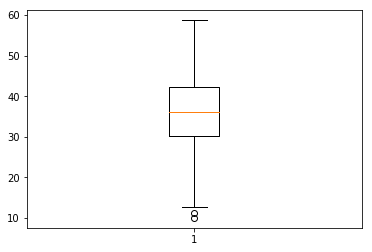

In [5]:
from matplotlib import pyplot
%matplotlib inline

# The plotting library needs access to the raw data values. Access those
# using the ``.values`` method
raw_values = ammonia.values
pyplot.boxplot(raw_values);

The boxplot gives you an idea of the distribution, the spread, of the data.

The key point is the orange center line, the line that splits the centre square (actually it is a rectangle, but it looks squarish). That horizontal line is the median.

It is surprising to see that middle chunk, that middle 50% of the sorted data values fall in such a narrow range of the rectangle.
![alt="Boxplot for the percentiles](images/summarizing-data/percentiles-ammonia.png)

The bottom 25% of the data falls below the box, and the top 25% of the data falls above the box. That is indicated to some extent by the whiskers, the lines leaving the middle square/rectangle shape. The whiskers tell how much spread there is in our data. We we see 2 single circles below the bottom whisker. These are likely *outliers*, data which are unusual, given the context of the rest of the data. More about *outliers* later.


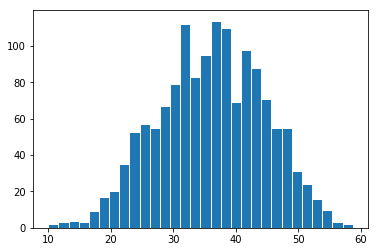

In [6]:
# Run this code to see that basic histogram.
# 1. Adjust the number of bins, and see how the histogram changes. The default number is 10.
# 2. Adjust the colour of the bin edges (borders). Try 'red', or 'black' or 'xkcd:pea soup'
pyplot.hist(raw_values, bins=30, edgecolor='white');

Ammonia    36.18
Name: 0.5, dtype: float64

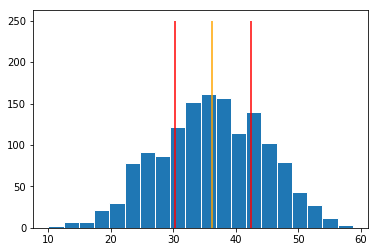

In [7]:
# It is helpful to visualize the 25th and 75th percentiles on the histogram.

# Run the following code:
pyplot.hist(raw_values, bins=20, edgecolor='white');

# Now superimpose on the histogram the 25th and the 75th percentiles  (a type of quantile)
# as vertical lines (vlines) on the histogram
pyplot.vlines(x=ammonia.quantile(0.25), ymin=0, ymax=250, color="red")
pyplot.vlines(x=ammonia.quantile(0.50), ymin=0, ymax=250, color="orange")
pyplot.vlines(x=ammonia.quantile(0.75), ymin=0, ymax=250, color="red")

# NOTE:
ammonia.quantile(0.5)  # The 0.5 quantile, is the same as the 50th percentile, is the same as the median.

It might not appear like it is true, but 
* 25% of the histogram area is to the left of the first red line
* 25% of the histogram area is between the red and the orange line
* 25% of the histogram area is between the orange line and the next red line to the right
* 25% of the histogram area is to the right of the second red line

All of that you can get from this single table. 
![alt=Pandas "describe" output](images/summarizing-data/ammonia-description.png)

Which brings us to two important points:
1. Tables **are** (despite what some people might say), a very effective form of summarizing data
2. Start your data analysis with the ``.describe()`` function to get a feel for your data.


### Looking ahead

We have not solved our complete objective yet. Scroll up, and recall what we needed to do: "*describe what time-based trends we see in the ammonia concentration of a wastewater stream*". We will look at that coming up, but here is a preview below. What trends do you see?

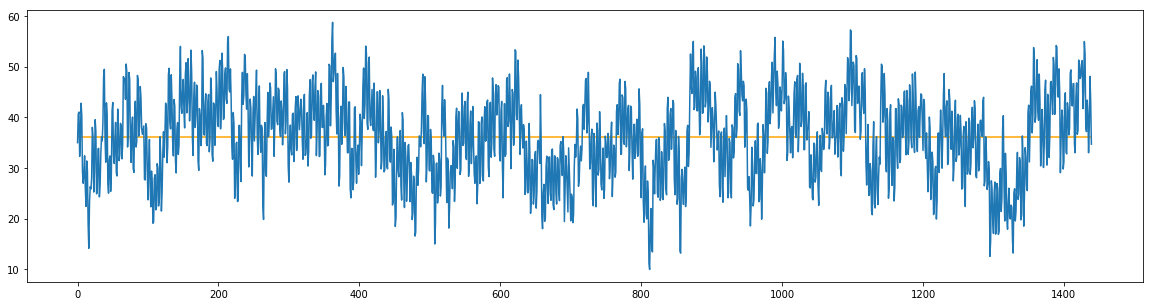

In [8]:
pyplot.figure(figsize=(20,5))
pyplot.plot(ammonia);

# Superimpose the median on the plot as a horizontal line (hline):
pyplot.hlines(y=ammonia.quantile(0.50), xmin=0, xmax=1440, color="orange");

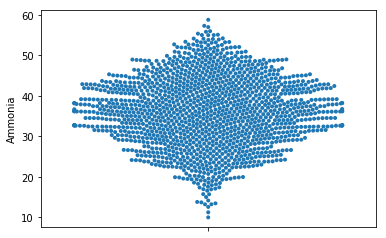

In [18]:

import seaborn as sns
tips = sns.load_dataset("tips")
sns.swarmplot(y=ammonia['Ammonia'],size=4);